In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Projectile Motion ##

In this notebook and lecture we will study how to solve newton's second law. We are going to simulate projectile motion by solving $\vec{F} = m\vec{a}$. 
We need to be able to solve second order differential equations in x and y coordinates. For a projectile motion these equation are: 

$$\frac{d^2x}{dt^2} = 0$$ 

$$\frac{d^2y}{dt^2}=-g$$

Lets start with a purely vertical motion, no motion in the x coordinate. This is a one dimensional problem and Newton's second law reduces to $\frac{d^2y}{dt^2}=-g$.
To solve this equation, we will break in to two first order differential equations by using the velocity $v_y$ as second variable

$$\frac{dy}{dt} = v_y$$ 

$$\frac{dv_y}{dt} = -g$$

We have a system of equation that we can solve using the euler method:

$$v_y(t+\Delta t) = v_y(t) - g \Delta t$$

$$y(t+\Delta t) = y(t) + v_y(t) \Delta t$$

An algorithm in python to solve this equation may look like this:
```python
    for i in range(len(y))
        vy[i+1] = v[i] - g * dt
        y[i+1] = y[i] + vy[i] * dt
        if y[i+1] < 0:
            break
```

### Exercise 1 ###
Implement the previous algorithm in python, plot $y(t)$ and compare with the exact analytical solution. Use the following initial conditions. $y(0) = 1$, $v_y(0) = 10$. (You need to plot both the numerical and analytical solution in the same plot)

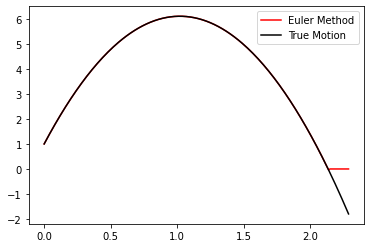

In [2]:
tmin = 0
tmax = 2.3
dt = 0.01

t = np.arange(tmin, tmax, dt)

y = np.zeros(t.size)
vy = np.zeros(t.size)

y[0] = 1
vy[0] = 10

g = 9.8

for i in range(t.size-1):
    vy[i+1] = vy[i] - g * dt
    y[i+1] = y[i] + vy[i]*dt - 0.5*g*dt**2
    if y[i+1] < 0:
        break

true_motion = y[0] + vy[0]*t - 0.5*g*t**2
        
plt.plot(t,y, label="Euler Method", color = 'red')
plt.plot(t,true_motion, label="True Motion", color = 'black')
plt.legend(loc = 'upper right')

### Drag Force ###
We are going to modify our equation to add air resistance. At normal speeds, the force of air resistance is approximately proportional to the square of the projectile velocity. $F_{drag} \approx -B_2 v^2$. The coefficient $B_2$ depends on the particular shape of the object and cannot be calculated exactly for most objects, in general they are measured in a lab setting or aprroximated. 

Here is a physical argument for the previous equation. A object moving in air must push the air particles in fron out of the way. The mass air moved in time dt is $m_{air} = \rho A v dt$ where $\rho$ is the density of air and $A$ is the frontal area of the object. The mass of air $m_{air}$ is given a velocity $v$ and also a kinetic energy $E_{air} \approx m_{air} v^2/2$. The work done by the drag force is equal to the kinetic energy,  
$$F_{drag} v dt = E_{air}$$ 
$$F_{drag} v dt \approx  m_{air} v^2/2$$
$$F_{drag} v dt \approx \rho A v dt v^2/2$$
$$F_{drag} \approx \rho A v^2/2$$
$$F_{drag} = -B_2 v^2$$
where $B_2$ is a constant that contains information such as the frontal area of the object, density.
Now for a object that is moving vertically, newton's second law is modified:

$$\frac{d^2y}{dt^2}=-g+F_{drag}$$

Now the drag force always opossed the motion, so if the object is going up, positive velocity, the drag force poing down, if the object moving down, the drag force points up. A way to write this would be:

$$\frac{d^2y}{dt^2}=-g-B_2 v_y^2 \frac{v_y}{|v|}$$
### Exercise 2 ##
Modify the previous problem in exercise on to include drag. Solve this problems for two different motions. $B_2 = 0.01$ and $0.1$. Compare with the exact solution without drag.

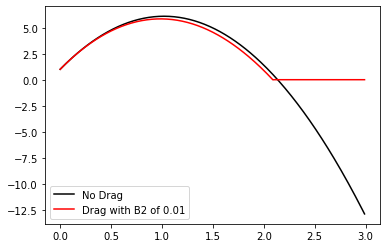

In [3]:
tmin = 0
tmax = 3
dt = 0.01

t = np.arange(tmin, tmax, dt)

y = np.zeros(t.size)
vy = np.zeros(t.size)
ay = np.zeros(t.size)

g = 9.8
B = 0.01

y[0] = 1
vy[0] = 10
ay[0] = -g - B*(vy[0]**2)  #Since the motion is starting with a velocity, the intial acceleration would not just be 9.8

for i in range(t.size-1):
    
    if vy[i] > 0:
        ay[i+1] = -g - B*(vy[i]**2)
    if vy[i] < 0:
        ay[i+1] = -g + B*(vy[i]**2)
        
    vy[i+1] = vy[i] + ay[i] * dt
    y[i+1] = y[i] + vy[i]*dt + 0.5*ay[i]*dt**2
    if y[i+1] < 0:
        break

no_drag = y[0] + vy[0]*t - 0.5*g*t**2

plt.plot(t,no_drag, label="No Drag", color = 'black')
plt.plot(t,y, label="Drag with B2 of 0.01", color = 'red')
plt.legend(loc='lower left')

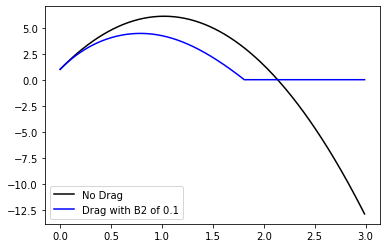

In [4]:
tmin = 0
tmax = 3
dt = 0.01

t = np.arange(tmin, tmax, dt)

y = np.zeros(t.size)
vy = np.zeros(t.size)
ay = np.zeros(t.size)

g = 9.8
B = 0.1

y[0] = 1
vy[0] = 10
ay[0] = -g - B*(vy[0]**2)  #Since the motion is starting with a velocity, the intial acceleration would not just be 9.8

for i in range(t.size-1):
    
    if vy[i] > 0:
        ay[i+1] = -g - B*(vy[i]**2)
    if vy[i] < 0:
        ay[i+1] = -g + B*(vy[i]**2)
        
    vy[i+1] = vy[i] + ay[i] * dt
    y[i+1] = y[i] + vy[i]*dt + 0.5*ay[i]*dt**2
    if y[i+1] < 0:
        break

plt.plot(t,no_drag, label="No Drag", color = 'black')
plt.plot(t,y, label="Drag with B2 of 0.1", color = 'blue')
plt.legend(loc='lower left')

## Terminal velocity ##

When object is free falling in a dense medium such as air or water, the velocity will not increase indefinitely, instead after some time it will reach a constant value know as terminal velocity. We can find this value from the equation above.
Whe the terminal velocity is reached, the acceleration is going to be zero, the drag force will cancel the pull of gravity.

$$\frac{d^2y}{dt} = 0 $$
$$-g + B_2 v_y^2=0$$

### Exercise 3 ###
Starting with the following initial condition, $y(0) = 0$, $v_y(0) = 0$ and a drag $B_2 = 0.1$ plot $v_y(t)$ vs time and find the terminal velocity. Compare with the value that you should expect.

The expected Terminal Velocity is: 9.899494936611665
The found Terminal Velocity is: -9.898699721282249


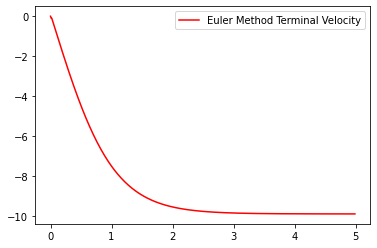

In [5]:
tmin = 0
tmax = 5
dt = 0.01

t = np.arange(tmin, tmax, dt)

vy = np.zeros(t.size)
ay = np.zeros(t.size)

g = 9.8
B = 0.1

vy[0] = 0
ay[0] = -g

for i in range(t.size-1):
    if vy[i] > 0:
        ay[i+1] = -g - B*(vy[i]**2)
    if vy[i] < 0:
        ay[i+1] = -g + B*(vy[i]**2)
        
    vy[i+1] = vy[i] + ay[i] * dt

t_velocity = np.sqrt(g/B)
print("The expected Terminal Velocity is:", t_velocity)
plt.plot(t,vy, label='Euler Method Terminal Velocity', color = 'red')
plt.legend(loc='upper right')
print("The found Terminal Velocity is:", np.min(vy))

We expect these answers to differ by a negative sign due to the equation we are using to find the Terminal Velocity. Since we cannot find the square root of a negative number, we have to take the terminal velocity as a positive number and then apply the direction after the fact. Which is why we see the expected terminal velocity as a positive 9.899 and the found terminal velocity as -9.898

## 2 Dimensions projectile motion ##
Let's look a projectile motion in 2 dimensions, now we have x and y position and velocities. For motion without air drag the equation are now:

$$\frac{d^2x}{dt^2} = 0$$ 

$$\frac{d^2y}{dt^2}=-g$$

which becomes 4 first order differential equations:


$$\frac{dx}{dt} = v_x$$ 

$$\frac{dv_x}{dt} = 0$$

$$\frac{dy}{dt} = v_y$$ 

$$\frac{dv_y}{dt} = -g$$

So our discrete version of the equation are now:

$$v_x(t+\Delta t) = v_x(t)$$

$$x(t+\Delta t) = x(t) + v_x(t) \Delta t$$

$$v_y(t+\Delta t) = v_y(t) - g \Delta t$$

$$y(t+\Delta t) = y(t) + v_y(t) \Delta t$$

Notice that there is no acceleration in the x component, this will change when we add drag to the problem. An algorithm in python to solve this equation may look like this:

```
    for i in range(len(y))
        vx[i+1] = vx[i]
        x[i+1] = x[i] + vx[i]*dt
        vy[i+1] = v[i] - g * dt
        y[i+1] = y[i] + vy[i] * dt
        if y[i+1] < 0:
            break
```

Below is an implementation in python. The initial size of the arry is unknown, so we start with a size of 1000 and increase it if necessay.
A the end we discard the portion of the array we did not use.


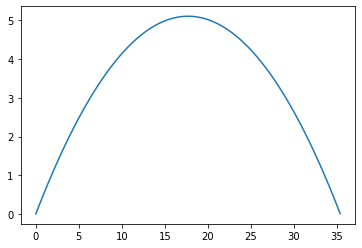

In [6]:
#Calculates the trajectory of a 2d projectile motion.
# input: x0: initial position in x
#        y0: initial position in y
#        v0: initial velocity sqrt(vx0^2 + vy0^2)
#        theta: initial angle
#        dt: delta t, time step

def proj_trajectory(x0, y0, v0, theta, dt):
    max_size = 100  #max size of arrays, it may increase
    g = 9.8
    x = np.zeros(max_size)   #initial conditions
    y = np.zeros(max_size)
    vx = np.zeros(max_size)
    vy = np.zeros(max_size)
    t = np.zeros(max_size)
    x[0] = x0
    y[0] = y0
    vx[0] = v0*np.cos(theta*np.pi/180)
    vy[0] = v0*np.sin(theta*np.pi/180)
    i=0
    while y[i] >= 0 and i < max_size-1:    #main loop, stops when y = 0, i.e. hits the ground
        vx[i+1] = vx[i]
        x[i+1]  =  x[i]  + vx[i]*dt
        vy[i+1] = vy[i]  - g * dt
        y[i+1]  =  y[i]  + vy[i] *dt
        t[i+1]  =  t[i] + dt
        i = i + 1
        if i == max_size - 1:  # check if we need to resize arrays
            max_size += max_size
            x.resize(max_size)
            y.resize(max_size)
            vx.resize(max_size)
            vy.resize(max_size)
            t.resize(max_size)
    x = x[:i]   #chop the arrays to proper sizes
    y = y[:i]
    vx = vx[:i]
    vy = vy[:i]
    t = t[:i]
    return t, x, y


t,x,y = proj_trajectory(0,0,20,30,0.001)
plt.plot(x,y)

### Exercise 4 ###
Write a subroutine to calculate the time of flight, maximum height and range of the projectile

Angle this Projectile was shot is: 30
Max Height of the Projectile is: 6250.175001001548
Max Range of the Projectile is: 43301.52999681685
Time elapsed for this is: 71.42899999997701



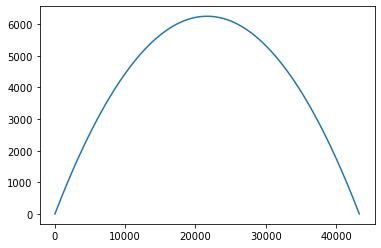

In [7]:
def proj_trajectory(x0, y0, v0, theta, dt):
    max_size = 100  #max size of arrays, it may increase
    g = 9.8
    x = np.zeros(max_size)   #initial conditions
    y = np.zeros(max_size)
    vx = np.zeros(max_size)
    vy = np.zeros(max_size)
    t = np.zeros(max_size)
    x[0] = x0
    y[0] = y0
    vx[0] = v0*np.cos(theta*np.pi/180)
    vy[0] = v0*np.sin(theta*np.pi/180)
    i=0
    while y[i] >= 0 and i < max_size-1:    #main loop, stops when y = 0, i.e. hits the ground
        vx[i+1] = vx[i]
        x[i+1]  =  x[i]  + vx[i]*dt
        vy[i+1] = vy[i]  - g * dt
        y[i+1]  =  y[i]  + vy[i] *dt
        t[i+1]  =  t[i] + dt
        i = i + 1
        if i == max_size - 1:  # check if we need to resize arrays
            max_size += max_size
            x.resize(max_size)
            y.resize(max_size)
            vx.resize(max_size)
            vy.resize(max_size)
            t.resize(max_size)
    x = x[:i]   #chop the arrays to proper sizes
    y = y[:i]
    vx = vx[:i]
    vy = vy[:i]
    t = t[:i]
    
    print("Angle this Projectile was shot is:", theta)
    print("Max Height of the Projectile is:", np.max(y))
    print("Max Range of the Projectile is:", np.max(x))
    print("Time elapsed for this is:", np.max(t))
    print("")
    return t, x, y


t,x,y = proj_trajectory(0,0,700,30,0.001)
plt.plot(x,y)

### Exercise 5 ###
Investigate the dependance of the trajectory with the angle by ploting a few trajectories for different angles. Show that the maximum range is obtained for $45^o$

Angle this Projectile was shot is: 30
Max Height of the Projectile is: 5.107041999999899
Max Range of the Projectile is: 35.351156982480234
Time elapsed for this is: 2.0409999999998862

Angle this Projectile was shot is: 35
Max Height of the Projectile is: 6.719817139341358
Max Range of the Projectile is: 38.369081754496655
Time elapsed for this is: 2.341999999999853

Angle this Projectile was shot is: 40
Max Height of the Projectile is: 8.438590078174604
Max Range of the Projectile is: 40.202012374883225
Time elapsed for this is: 2.623999999999822

Angle this Projectile was shot is: 45
Max Height of the Projectile is: 10.211153040667265
Max Range of the Projectile is: 40.828345545711166
Time elapsed for this is: 2.886999999999793

Angle this Projectile was shot is: 50
Max Height of the Projectile is: 11.983663380761355
Max Range of the Projectile is: 40.199937109794185
Time elapsed for this is: 3.1269999999997666

Angle this Projectile was shot is: 55
Max Height of the Projectile is: 

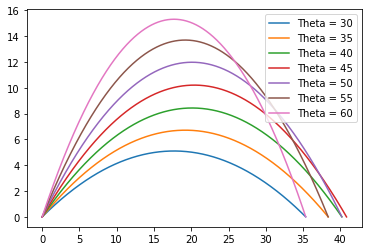

In [8]:
t,x,y = proj_trajectory(0,0,20,30,0.001)
plt.plot(x,y, label="Theta = 30")
t,x,y = proj_trajectory(0,0,20,35,0.001)
plt.plot(x,y, label="Theta = 35")
t,x,y = proj_trajectory(0,0,20,40,0.001)
plt.plot(x,y, label="Theta = 40")
t,x,y = proj_trajectory(0,0,20,45,0.001)
plt.plot(x,y, label="Theta = 45")
t,x,y = proj_trajectory(0,0,20,50,0.001)
plt.plot(x,y, label="Theta = 50")
t,x,y = proj_trajectory(0,0,20,55,0.001)
plt.plot(x,y, label="Theta = 55")
t,x,y = proj_trajectory(0,0,20,60,0.001)
plt.plot(x,y, label="Theta = 60")
plt.legend(loc='upper right')

Looking at the plot, we can see that Theta = 45 has the longest range of all the angles. We can also see numerically that it has the largest range of 40.83 meters

### Adding drag to the 2D projectile motion ###
The next step is to add air resistance to our projectile. As discussed before, the drag force is proportional to the velocity square $F_{drag} = -B_2 v^2$. Now for a 2D motion we have two components and $v = \sqrt{v_x^2+v_y^2}$. The force is always directed in the same direction as the velocity. This direction is given by the follwing unit vector

$$\hat{v} = \frac{v_x\hat{i}+v_y\hat{j}}{\sqrt{v_x^2+v_y^2}} = \frac{v_x\hat{i}+v_y\hat{j}}{v}$$

and the drag force is then written as

$$\vec{F}_{drag} = -B_2 v^2 \frac{v_x\hat{i}+v_y\hat{j}}{\sqrt{v_x^2+v_y^2}} = -B_2 v(v_x\hat{i}+v_y\hat{j})$$


Now, using $\vec{a} = \vec{F}/m$ we can write the equations for a projectile with drag as:

$$\frac{dx}{dt} = v_x $$ 

$$\frac{dv_x}{dt} = - \frac{B_2 \ v v_x}{m} $$

$$\frac{dy}{dt} = v_y$$ 

$$\frac{dv_y}{dt} = -g - \frac{B_2 v v_y}{m} $$

Notice that now we need to include the mass of the object. The seudo code in python for this problem would be:

```    
    for i in range(len(y))
        v = np.sqrt(vx[i]**2 + vy[i]**2)
        vx[i+1] = vx[i] - B2 * v * vx[i]/mass
        x[i+1] = x[i] + vx[i]*dt
        vy[i+1] = v[i] - g * dt - B2* v * vy[i]/mass
        y[i+1] = y[i] + vy[i] * dt
        if y[i+1] < 0:
            break    
```


### Exercise 6 ###
Write a function called projectile_motion_with_drag that would produce as result the trajectory of projectile under gravity and a drag force. The function should have the following signature:

```def projectile_motion_with_drag(x0, y0, v0, theta, dt, B2)```

Similar to what we had before. It is best if you work with a copy of the function you had before.

Plot the trajectory a cononshell that starts from the origin for various angles (at least 5) using the following initial velocity: $v0 = 700m/s$, and $B_2/m = 4x10^{-5} m^{-1}$

Angle this Projectile was shot is: 35
Max Height of the Projectile is: 5173.829441086284
Max Range of the Projectile is: 20772.270043085726
Time elapsed for this is: 59.70000000000058

Angle this Projectile was shot is: 40
Max Height of the Projectile is: 6293.144836913971
Max Range of the Projectile is: 20846.155087317056
Time elapsed for this is: 65.60000000000055

Angle this Projectile was shot is: 45
Max Height of the Projectile is: 7414.990681930326
Max Range of the Projectile is: 20464.04624422371
Time elapsed for this is: 71.00000000000024

Angle this Projectile was shot is: 50
Max Height of the Projectile is: 8513.817953725073
Max Range of the Projectile is: 19634.614320688663
Time elapsed for this is: 75.79999999999997

Angle this Projectile was shot is: 55
Max Height of the Projectile is: 9564.855948370712
Max Range of the Projectile is: 18409.703503100427
Time elapsed for this is: 80.19999999999972



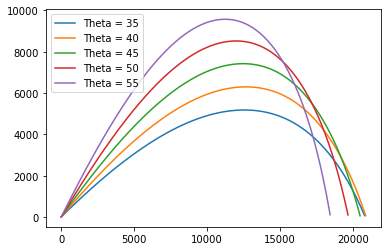

In [9]:
def proj_trajectory_with_drag(x0, y0, v0, theta, dt, B2m):
    max_size = 1000  #max size of arrays, it may increase
    g = 9.8
    B2 = B2m
    x = np.zeros(max_size)   #initial conditions
    y = np.zeros(max_size)
    vx = np.zeros(max_size)
    vy = np.zeros(max_size)
    ax = np.zeros(max_size)
    ay = np.zeros(max_size)
    t = np.zeros(max_size)
    x[0] = x0
    y[0] = y0
    vx[0] = v0*np.cos(theta*np.pi/180)
    vy[0] = v0*np.sin(theta*np.pi/180)
    ax[0] = -B2*v0*vx[0]              #with initial velocity, we have some initial x-drag
    ay[0] = -g - B2*v0*vy[0]          #with initial velocity, we have some initial y-drag
    z = 0
    for i in range(max_size-1):
        
        v = np.sqrt(vx[i]**2 + vy[i]**2)
        
        if vx[i] > 0:             #Incase this projectile would be in the air so long that its vx would change direction we change direction of drag
            ax[i+1] = -B2*v*vx[i]
        if vx[i] < 0:
            ax[i+1] = B2*v*vx[i]
            
        if vy[i] > 0:             #Incase this projectile would be in the air so long that its vy would change direction we change direction of drag
            ay[i+1] = -g - B2*v*vy[i]
        if vy[i] < 0:
            ay[i+1] = -g + B2*v*vy[i]
        
        vx[i+1] = vx[i] + ax[i]*dt
        x[i+1] = x[i] + vx[i]*dt + 0.5*ax[i]*dt**2
        vy[i+1] = vy[i] + ay[i]*dt
        y[i+1] = y[i] + vy[i] * dt + 0.5*ay[i]*dt**2
        t[i+1]  =  t[i] + dt
        if y[i+1] < 0:
            break    
        z = z + 1
        if z == max_size - 1:  # check if we need to resize arrays
            max_size += max_size
            x.resize(max_size)
            y.resize(max_size)
            vx.resize(max_size)
            vy.resize(max_size)
            t.resize(max_size)
    x = x[:z]   #chop the arrays to proper sizes
    y = y[:z]
    vx = vx[:z]
    vy = vy[:z]
    t = t[:z]
    
    print("Angle this Projectile was shot is:", theta)
    print("Max Height of the Projectile is:", np.max(y))
    print("Max Range of the Projectile is:", np.max(x))
    print("Time elapsed for this is:", np.max(t))
    print("")
    return t, x, y

t,x,y = proj_trajectory_with_drag(0,0,700,35,0.1,0.00004)
plt.plot(x,y, label="Theta = 35")
t,x,y = proj_trajectory_with_drag(0,0,700,40,0.1,0.00004)
plt.plot(x,y, label="Theta = 40")
t,x,y = proj_trajectory_with_drag(0,0,700,45,0.1,0.00004)
plt.plot(x,y, label="Theta = 45")
t,x,y = proj_trajectory_with_drag(0,0,700,50,0.1,0.00004)
plt.plot(x,y, label="Theta = 50")
t,x,y = proj_trajectory_with_drag(0,0,700,55,0.1,0.00004)
plt.plot(x,y, label="Theta = 55")
plt.legend(loc='upper left')

We can see that best launch angle is not actually 45 degrees, which since we are taking into account drag, makes sense. We could experiment with the launch angle to actually find the best angle for this projectile but I don't feel like doing that.

### Exercise 7 ###
For an initial angle of $35^{\circ}$ plot the trajectory with and without drag using the same initial velocity and some $B_2$ as before. Compare both solutions in the same graph

Angle this Projectile was shot is: 35
Max Height of the Projectile is: 8244.833723274962
Max Range of the Projectile is: 47019.32734218818
Time elapsed for this is: 81.99999999999962

Angle this Projectile was shot is: 35
Max Height of the Projectile is: 5173.829441086284
Max Range of the Projectile is: 20772.270043085726
Time elapsed for this is: 59.70000000000058



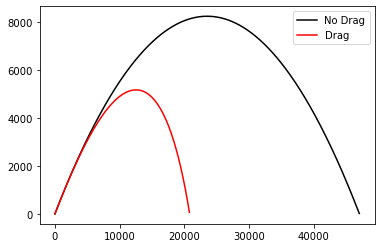

In [10]:
t,x,y = proj_trajectory(0,0,700,35,0.1)
plt.plot(x,y, label="No Drag", color = 'black')

t,x,y = proj_trajectory_with_drag(0,0,700,35,0.1,0.00004)
plt.plot(x,y, label="Drag", color = 'red')

plt.legend(loc='upper right')

### Exercise 8 ###
The maximum speed of a batted baseball is about 110 mph or about 50 m/s. At this speed, the ball drag coefficient $B_2$ is approximately $0.005 m^-1$. Using your function with these inputs, estimate the maximum range of a batted baseball and the angle at which the maximum range is attained. Is your answer reasonable, compared to the typical distance of an outfield fence from home plate (about 350-400 feet). How far would this baseball go without air resistance

Angle this Projectile was shot is: 37.5
Max Height of the Projectile is: 33.37862876128459
Max Range of the Projectile is: 130.863521038951
Time elapsed for this is: 4.87999999999994

Angle this Projectile was shot is: 40
Max Height of the Projectile is: 36.77103408033351
Max Range of the Projectile is: 131.12587544293677
Time elapsed for this is: 5.1099999999999355

Angle this Projectile was shot is: 42.5
Max Height of the Projectile is: 40.17699496457928
Max Range of the Projectile is: 130.79029283711043
Time elapsed for this is: 5.339999999999931

Angle this Projectile was shot is: 45
Max Height of the Projectile is: 43.57594444612119
Max Range of the Projectile is: 129.53470676822647
Time elapsed for this is: 5.549999999999926

Angle this Projectile was shot is: 47.5
Max Height of the Projectile is: 46.94733803845526
Max Range of the Projectile is: 127.69918343618546
Time elapsed for this is: 5.759999999999922



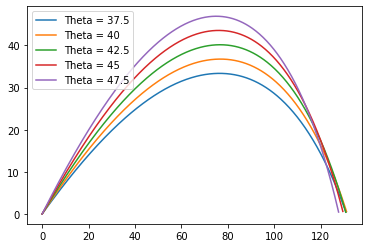

In [11]:
t,x,y = proj_trajectory_with_drag(0,0,50,37.5,0.01,0.005)
plt.plot(x,y, label="Theta = 37.5")
t,x,y = proj_trajectory_with_drag(0,0,50,40,0.01,0.005)
plt.plot(x,y, label="Theta = 40")
t,x,y = proj_trajectory_with_drag(0,0,50,42.5,0.01,0.005)
plt.plot(x,y, label="Theta = 42.5")
t,x,y = proj_trajectory_with_drag(0,0,50,45,0.01,0.005)
plt.plot(x,y, label="Theta = 45")
t,x,y = proj_trajectory_with_drag(0,0,50,47.5,0.01,0.005)
plt.plot(x,y, label="Theta = 47.5")
plt.legend(loc='upper left')

My answers for the range of baseball are reasonable. The function evaluates the range in meters but a quick conversion tells us that if you were to hit the ball at 110 mph or 50 m/s at any angle that would be considered reasonable, you will get a homerun. We can also make a good approximate of the ideal batting angle being 40 degrees as it gets you a range of 131.1 meters or 430.1 feet.  

Angle this Projectile was shot is: 37.5
Max Height of the Projectile is: 47.42150221085634
Max Range of the Projectile is: 246.7328888305726
Time elapsed for this is: 6.219999999999912

Angle this Projectile was shot is: 40
Max Height of the Projectile is: 52.86172798859277
Max Range of the Projectile is: 251.26257734302303
Time elapsed for this is: 6.559999999999905

Angle this Projectile was shot is: 42.5
Max Height of the Projectile is: 58.38611081370177
Max Range of the Projectile is: 254.36068119949144
Time elapsed for this is: 6.899999999999897

Angle this Projectile was shot is: 45
Max Height of the Projectile is: 63.95237400417228
Max Range of the Projectile is: 255.2655480083454
Time elapsed for this is: 7.2199999999998905

Angle this Projectile was shot is: 47.5
Max Height of the Projectile is: 69.51829798870892
Max Range of the Projectile is: 254.3597131672934
Time elapsed for this is: 7.529999999999884



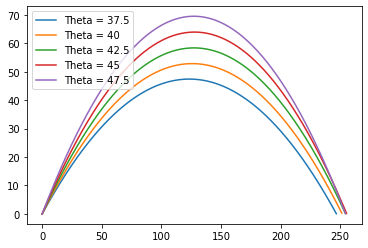

In [12]:
t,x,y = proj_trajectory(0,0,50,37.5,0.01)
plt.plot(x,y, label="Theta = 37.5")
t,x,y = proj_trajectory(0,0,50,40,0.01)
plt.plot(x,y, label="Theta = 40")
t,x,y = proj_trajectory(0,0,50,42.5,0.01)
plt.plot(x,y, label="Theta = 42.5")
t,x,y = proj_trajectory(0,0,50,45,0.01)
plt.plot(x,y, label="Theta = 45")
t,x,y = proj_trajectory(0,0,50,47.5,0.01)
plt.plot(x,y, label="Theta = 47.5")
plt.legend(loc='upper left')

We can see that if we do not include the drag force, the range of the baseball pretty much doubles. With the ideal batting angle being 45 degrees getting you a range of 255.3 meters or 837.6 feet.